## Name : Sahil Gupta
## Roll No : D21030

### Excercise

1. Use the same set of predictors to fit a kNN model. (choose appropiate values of k using CV)
2. Fit Linear Regression on the same data. Use CV to validate the model.
3. Fit Decision Tree on the same data. Use CV to validate the model.
4. Choose the best competing models for testing.
5. Report the best performing model.

GIVE EXPLANATIONS

#### Objective :
To use a set of predictors and target on different machine learning models and report the best performing model by comparing the error metrics.


In [1]:
#getting the required libraries
import numpy as np
import pandas as pd

#for train-test split
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#for fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#to create the confusion matrix
from sklearn.metrics import confusion_matrix

#for fitting kNN regression model
from sklearn.neighbors import KNeighborsRegressor

#to get the cross validaton score
from sklearn.model_selection import cross_val_score

#for fitting linear regression model
from sklearn import linear_model

#for plotting the decision tree
from sklearn import tree

#for ploting the graph
from matplotlib import pyplot as plt

In [2]:
# Set the working directory 
import os
os.chdir(r"C:\Users\Lenovo\Documents\Codes")
#Read the cars.csv data
cars = pd.read_csv("cars.csv")
cars.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [3]:
X = cars[['Cylinders', 'Weight', 'Horsepower']]             #defining the set of predictors and the target 
y = cars['MPG']

In this, we have used the Cylinders, Weight, Horsepower as the set of predictors to predict the value of MPG.
We will use different models on this set of predictors and basedd on the error metrics we will find the best model for the predictioin of target i.e. MPG.

In [4]:
## Train - test split in the ratio 70 : 30 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

We perform a train-test split in the ratio 70 : 30 to split the data for training and have some data available for testing to predict the performance of our model and calculate the error metrics.

## 1. KNN Algorithm

Here we use KNN algorithm model to find the value of target variable based on the learning algorithm instantiated on the 
training data.

In [6]:
#using Cross Validation to choose optimal k
neighbors = list(range(1,120))

#empty list that will hold cv scores
cv_scores_knn = []

#perform 10 fold cross validation
for k in neighbors :
    knn =  KNeighborsRegressor(n_neighbors = k)
    scores_knn = cross_val_score(knn, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')    
    cv_scores_knn.append(scores_knn.mean())

Above we perform a 10 fold cross validatoin on the training data with values of k i.e. number of nearest neighbors ranging
from 1 to 120 to get the optimal(best) value of nearest neighbors for which the training model gives minimum error.
The error metric used here is the Mean Squared error.
The error metric gives us the negative values of the means of the cross validation score for each iteration.
Therefore we take the absolute value before finding out the best fit value of k.
The value of k for which the cross validation error is minimum is the best fit value.

In [7]:
#cv_scores_knn
np.abs(cv_scores_knn)      #taking absolute values to find the minimun cross validation score

array([48.89641626, 40.91213085, 35.52168555, 33.35274484, 32.04907798,
       31.90612705, 31.41478697, 31.49119497, 31.6476336 , 31.77474825,
       31.91611773, 32.38195317, 31.95007579, 32.00087575, 31.91025078,
       31.64880587, 31.5162284 , 31.20029215, 31.2158444 , 31.17454003,
       31.01306442, 31.15922028, 30.97781112, 31.30452068, 31.12244071,
       30.98657091, 31.02902978, 30.9232811 , 30.89428969, 30.83189158,
       30.88278457, 30.89307918, 30.85826608, 30.82306906, 30.59707272,
       30.54576623, 30.426177  , 30.23424133, 30.35256396, 30.30542254,
       30.28582939, 30.23467158, 30.07741423, 30.08626422, 30.07342926,
       30.057687  , 30.07053641, 30.09862218, 30.07511539, 30.04591415,
       30.04090697, 30.05274734, 29.96458432, 30.11114651, 30.13088774,
       30.25355214, 30.18838809, 30.12554753, 30.05621883, 30.02076263,
       29.98792213, 30.02583454, 29.93299384, 30.00063923, 30.02288337,
       30.0767107 , 30.1006871 , 30.08928062, 30.0476046 , 30.14

The plot below shows how the cross validation score varies as we change the value of k.
The value of k for which the cross validatioin score is minimum we select that value  for our best fit model.

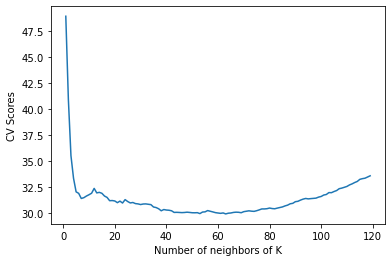

In [8]:
plt.plot (neighbors, np.abs(cv_scores_knn))       #plot of k (neighbors) vs the CV score
plt.xlabel('Number of neighbors of K')
plt.ylabel('CV Scores')
plt.show()

In [9]:
np.min(np.abs(cv_scores_knn))     #to find the minimum value of CV score

29.932993839261666

In [10]:
optimal = np.where(np.abs(cv_scores_knn) == np.min(np.abs(cv_scores_knn)))   #to get the index of the optimal value of k
optimal

(array([62], dtype=int64),)

In [11]:
type(optimal)

tuple

In [12]:
type(optimal[0])

numpy.ndarray

In [13]:
type(optimal[0][0])

numpy.int64

In [14]:
optimal[0][0]

62

Above we got the optinmal value of k i.e. the value of k(neighbors) for which the cross validation score is the minimum.
Now we instantiate a learning model for k = optimal value and also fit the training data into it to predict the value of
target variable and calculate the error metrics.

In [15]:
#instantiate an learning model (k = optimal value from the graph/array)
knn = KNeighborsRegressor(n_neighbors = (optimal[0][0] + 1)) #KNN

#fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=63)

Calculating the cross validation score for the fitted model.
We can also see that the cross validation score for the fitted model is equal to the minimum cross validation score of the
cross validation score array.

In [16]:
scores_fit_knn = cross_val_score(knn, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
np.abs(scores_fit_knn.mean())

29.932993839261666

In [17]:
np.abs(scores_fit_knn.mean()) == np.min(np.abs(cv_scores_knn))  #comparing the 2 cross validation scores

True

In [18]:
y_pred = knn.predict(X_test)     #predicting the target varible using the model.
y_pred 

array([18.10952381, 30.16666667, 27.38253968, 24.68571429, 18.10952381,
       24.61111111, 16.98571429, 25.61904762, 17.63650794, 24.44603175,
       32.14603175, 13.45396825, 13.45396825, 32.43968254, 24.66190476,
       25.55873016, 25.76190476, 22.61111111, 21.05238095, 24.45714286,
       24.44603175, 24.52063492, 29.73650794, 29.73650794, 17.01746032,
       13.77460317, 23.03174603, 17.56507937, 25.39206349, 30.71428571,
       22.38095238, 20.01428571, 23.03174603, 32.32857143, 15.33650794,
       32.32857143, 19.23492063, 25.92698413, 18.9968254 , 13.77460317,
       20.41587302, 30.83174603, 15.33650794, 20.13809524, 30.85079365,
       28.57142857, 15.32857143, 32.13650794, 27.80793651, 19.52063492,
       30.1952381 , 30.85555556, 17.63650794, 13.45396825, 15.36190476,
       15.32857143, 16.07777778, 31.12698413, 20.13492063, 13.45396825,
       23.57142857, 20.88253968, 32.43968254, 18.10952381, 16.7984127 ,
       29.42698413, 32.32857143, 32.43968254, 32.43968254, 30.52

After prediction we compare the predicted results with the actual results and compute the following error metrics :
1. Root Mean Square error
2. Mean Square error
3. Mean Absolute error

In [19]:
#RMSE_knn
RMSE_knn = np.sqrt(np.mean((np.array(y_test)-y_pred)**2))
RMSE_knn

4.001215760331699

In [20]:
#MSE_knn
MSE_knn = np.mean((np.array(y_test)-y_pred)**2)
MSE_knn

16.009727560726777

In [21]:
#MAE_knn
MAE_knn = np.mean(np.abs((np.array(y_test)-y_pred)))
MAE_knn

2.9165755919854273

These error metrics can be used to compare and find the best fit model for the given set of predictors and target.

## 2. Linear Regression

Here we use Linear Regression model to find the value of target variable based on the learning algorithm instantiated on the training data.

In [22]:
regr = linear_model.LinearRegression()       #instantiating a Linear Regression model

In [23]:
#perform 10 fold cross validation to get the cross validation scores

In [24]:
scores_regr = cross_val_score(regr, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
scores_regr

array([-67.88697032, -15.79886501, -22.64162218, -22.71931563,
       -19.59252464, -24.08258109, -43.01242385, -40.16815979,
       -20.94553981, -27.23799595])

The scoring criteria gives us the negative values of the cross validation score.
Therefore we take the absolute values.

In [25]:
cv_score_regr = np.abs(np.mean(scores_regr))       #taking absolute value of the mean of the cross validation scores
cv_score_regr                                      

30.408599827050505

In [26]:
regr.fit (X_train, y_train)           #fitting the data into the model

LinearRegression()

In [27]:
print('Intercept b0 : ', regr.intercept_)
print('Coefficients : ', regr.coef_)

Intercept b0 :  45.96033953452148
Coefficients :  [-0.27710431 -0.00536833 -0.05272208]


In [28]:
y_pred1 = regr.predict(X_test)          #predicting the target varible using the model.
y_pred1

array([20.37535687, 29.61946209, 27.35522323, 25.730541  , 22.07760712,
       25.38103729, 17.80040685, 25.92846102, 20.20757818, 25.50314854,
       30.58632403,  9.72137596, 11.40335031, 31.70926675, 24.77272942,
       26.22787342, 27.28615997, 22.8745152 , 28.55903334, 24.45006737,
       24.58003155, 25.28536855, 28.40012557, 28.66373596, 19.53845911,
       12.6161943 , 23.55067212, 19.78484031, 25.93646012, 29.31290504,
       24.27035457, 20.85089006, 28.86375791, 30.71997024, 15.64489504,
       30.76291689, 21.93193709, 26.38547755, 20.61693183,  9.26000879,
       23.33555645, 30.07152621, 18.47440509, 22.14803078, 29.7536704 ,
       27.50677045, 15.55900172, 30.66340317, 27.09353534, 21.4066388 ,
       29.35104546, 28.61678136, 21.56500446,  9.14783591, 14.00474314,
       18.72784092, 15.21911047, 30.23393658, 19.93011148, 11.87095734,
       24.08063046, 23.23107354, 32.24586381, 20.6121256 , 18.93071335,
       27.94766229, 30.85129481, 32.42149543, 32.24033252, 28.98

Computing the error metrics from the actual  and the predicted data.

In [29]:
#RMSE_regr
RMSE_regr = np.sqrt(np.mean((np.array(y_test)-y_pred1)**2))
RMSE_regr

4.137032451968018

In [30]:
#MSE_regr
MSE_regr = np.mean((np.array(y_test)-y_pred1)**2)
MSE_regr

17.11503750863651

In [31]:
#MAE_regr
MAE_regr = np.mean(np.abs((np.array(y_test)-y_pred1)))
MAE_regr

3.1810011349672362

## 3. Decision Tree

Here we use Decision Tree model to find the value of target variable based on the learning algorithm instantiated on the training data.

In [32]:
#using Cross Validation to choose optimal depth
depth = list(range(1,10))

#empty list that will hold cv scores
cv_scores_dt = []

#perform 10 fold cross validation
for i in depth :
    model = DecisionTreeRegressor(max_depth = i, min_samples_leaf = 5)
    scores_dt = cross_val_score(model, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
    cv_scores_dt.append(scores_dt.mean())

In this we use a 10 fold cross validation to select the optimal value of the depth of the tree.
We take the depth which corresponds to the minimum cross validation score.
We take the absolute values as the error metric gives us negative values.


In [33]:
#cv_scores_dt
np.abs(cv_scores_dt)       #taking absolute value of the CV scores

array([42.76616147, 34.67011205, 31.54287916, 31.14699706, 33.84662888,
       35.1870814 , 34.89935551, 35.05419885, 35.09119036])

The plot below shows how the cross validation score varies as we change the depth of tree. The value of depth for which the cross validatioin score is minimum we select that value for our best fit model.

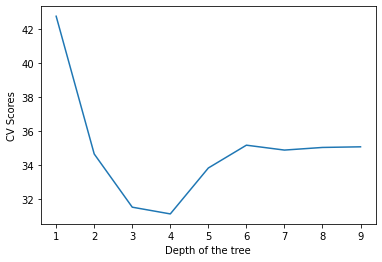

In [34]:
plt.plot (depth, np.abs(cv_scores_dt))                 #plot of depth vs the CV score
plt.xlabel('Depth of the tree')
plt.ylabel('CV Scores')
plt.show()

In [35]:
np.min(np.abs(cv_scores_dt))           #min value of cross validation score from the array of CV score

31.146997061925084

In [36]:
optimal = np.where(np.abs(cv_scores_dt) == np.min(np.abs(cv_scores_dt)))          #finding the index of the optimal value
optimal

(array([3], dtype=int64),)

In [37]:
optimal[0][0]

3

In [38]:
#instantiate an learning model (max_depth = optimal value from the graph/array)
model = DecisionTreeRegressor(max_depth = (optimal[0][0] + 1), min_samples_leaf = 5)

#fitting the model
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

In [39]:
scores_fit_dt = cross_val_score(model, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
np.abs(scores_fit_dt.mean())

31.146997061925084

In [40]:
np.min(np.abs(cv_scores_dt)) == np.abs(scores_fit_dt.mean())        #comparing the 2 cross validation scores

True

In [41]:
y_pred2 = model.predict(X_test)              #predicting the target varible using the model.
y_pred2

array([18.4325    , 33.36981132, 23.82      , 26.34814815, 23.04      ,
       26.34814815, 18.4325    , 26.34814815, 18.4325    , 26.34814815,
       33.36981132, 12.94761905, 12.94761905, 33.36981132, 26.34814815,
       26.34814815, 26.13333333, 20.73181818, 28.        , 26.34814815,
       26.34814815, 26.34814815, 23.82      , 30.29375   , 18.4325    ,
       14.69      , 20.73181818, 18.4325    , 26.34814815, 33.36981132,
       20.73181818, 18.4325    , 23.04      , 33.36981132, 14.69      ,
       33.36981132, 18.4325    , 26.34814815, 18.4325    , 12.94761905,
       23.04      , 33.36981132, 18.4325    , 18.4325    , 33.36981132,
       23.82      , 14.69      , 33.36981132, 23.82      , 18.4325    ,
       33.36981132, 28.91111111, 28.        , 12.94761905,  9.51666667,
       18.4325    ,  9.51666667, 33.36981132, 18.4325    , 14.69      ,
       20.73181818, 18.4325    , 29.32857143, 18.4325    , 18.4325    ,
       23.82      , 33.36981132, 33.36981132, 33.36981132, 33.36

Computing the error metrics from the actual  and the predicted data.

In [42]:
#RMSE_dt
RMSE_dt = np.sqrt(np.mean((np.array(y_test)-y_pred2)**2))
RMSE_dt

3.9102539550483186

In [43]:
#MSE_dt
MSE_dt = np.mean((np.array(y_test)-y_pred2)**2)
MSE_dt

15.290085992971019

In [44]:
#MAE_dt
MAE_dt = np.mean(np.abs((np.array(y_test)-y_pred2)))
MAE_dt

2.7848047284779813

In [45]:
############### Plotting a Decision Tree with depth = 4 #####################

In [46]:
feature_X = cars.columns[[2,5,4]]        #defining the predictors as the features
feature_X

Index(['Cylinders', 'Weight', 'Horsepower'], dtype='object')

In [47]:
#instantiate an learning model with max_depth = 4
model = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5)

#fitting the model
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

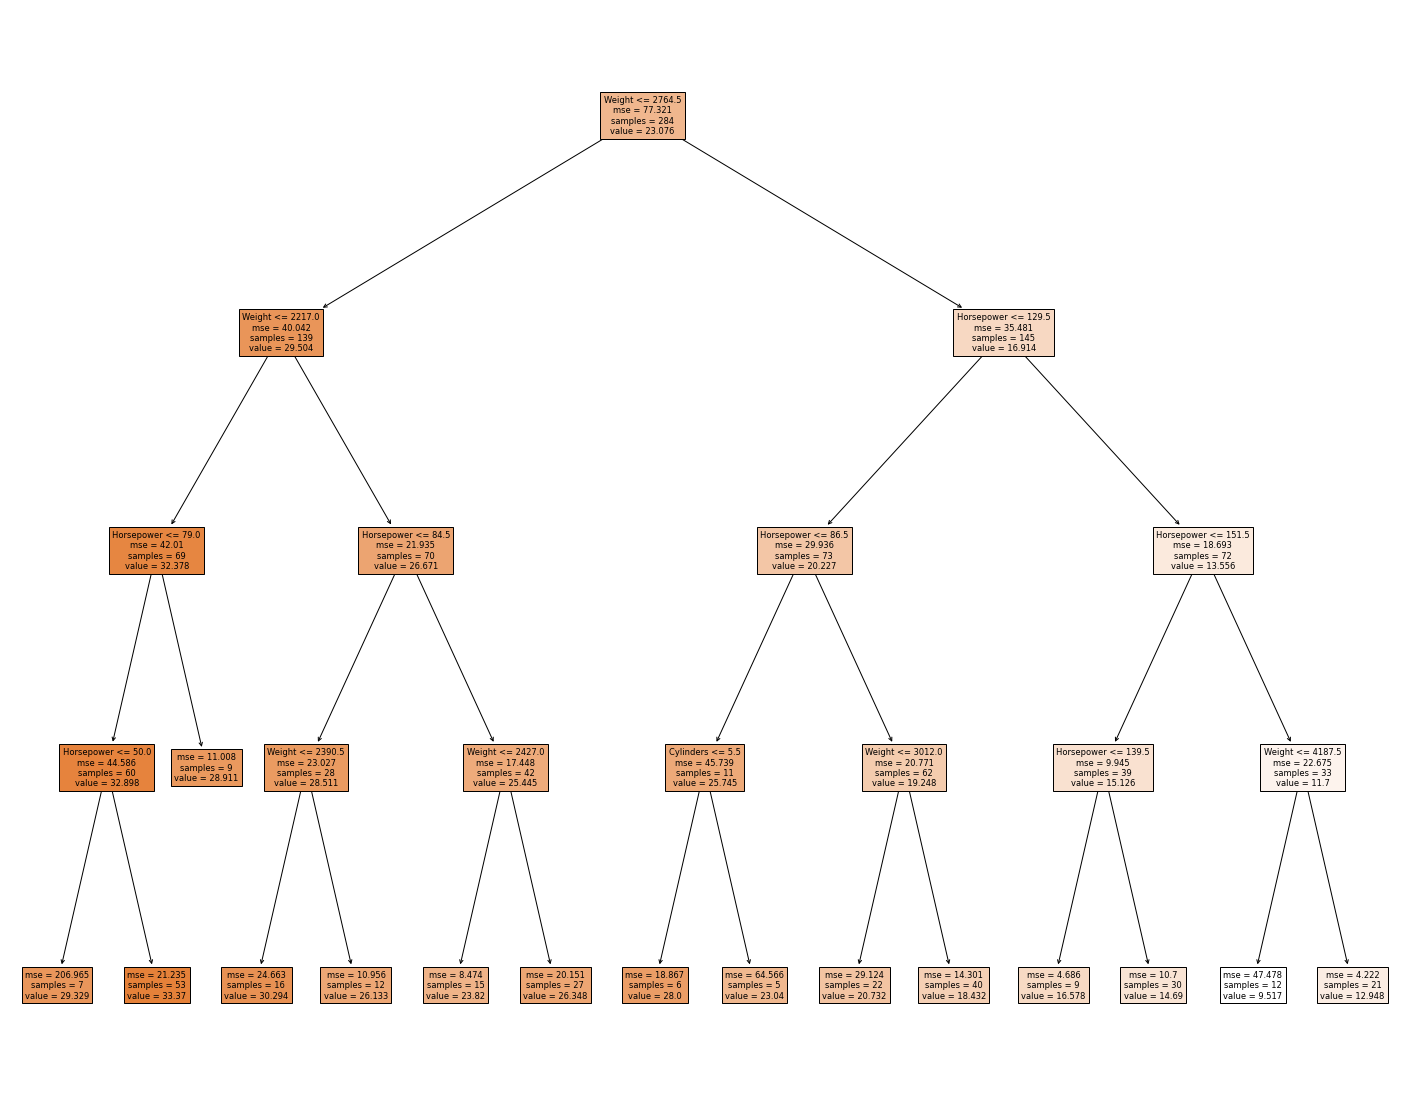

In [48]:
from matplotlib import pyplot as plt                #plotting a decision tree
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(model,
                   feature_names=feature_X,  
                   class_names=y_train,
                   filled=True)

## Reporting the best performing model :

For each competing model we used the model which has the minimum cross validation score for the prediction and finding the 
error from the test data.

In [49]:
#Getting the minimum CV scores for each model 
print('Minimun CV score for KNN Algorithm : ', np.min(np.abs(cv_scores_knn)))
print('Minimun CV score for Linear Regression : ', cv_score_regr)
print('Minimun CV score for Decision Tree : ', np.min(np.abs(cv_scores_dt)))

Minimun CV score for KNN Algorithm :  29.932993839261666
Minimun CV score for Linear Regression :  30.408599827050505
Minimun CV score for Decision Tree :  31.146997061925084


In [50]:
#getting the error metrics for the best fit model
print('Root Mean Square error for KNN Algorithm with best fit : ', RMSE_knn)
print('Root Mean Square error for Linear Regression with best fit : ', RMSE_regr)
print('Root Mean Square error for Decision Tree with best fit : ', RMSE_dt)

Root Mean Square error for KNN Algorithm with best fit :  4.001215760331699
Root Mean Square error for Linear Regression with best fit :  4.137032451968018
Root Mean Square error for Decision Tree with best fit :  3.9102539550483186


In [51]:
print('Mean Square error for KNN Algorithm with best fit : ', MSE_knn)
print('Mean Square error for Linear Regression with best fit : ', MSE_regr)
print('Mean Square error for Decision Tree with best fit : ', MSE_dt)

Mean Square error for KNN Algorithm with best fit :  16.009727560726777
Mean Square error for Linear Regression with best fit :  17.11503750863651
Mean Square error for Decision Tree with best fit :  15.290085992971019


In [52]:
print('Mean Absolute error for KNN Algorithm with best fit : ', MAE_knn)
print('Mean Absolute error for Linear Regression with best fit : ', MAE_regr)
print('Mean Absolute error for Decision Tree with best fit : ', MAE_dt)

Mean Absolute error for KNN Algorithm with best fit :  2.9165755919854273
Mean Absolute error for Linear Regression with best fit :  3.1810011349672362
Mean Absolute error for Decision Tree with best fit :  2.7848047284779813


Based on the error metrics calculated and the cross fold validation scores for the each model with the best fit parameters we can conclude that the KNN model is the best to predict the target as it has the lowest cross validation score.

Note : The error metric used here in cross fold validation to get the optimal value of k i.e. neighbors is mean square error. If we use a differnt error metric such as mean absolute error or root mean square error, we get a differnet optimal value of k. In each case we find that the KNN model is the best performing model.

Below is a summary of the error metrics calculated and the cross validation score for the best fit  KNN model with the value of k neighbors = 63 and the scoring metric is mean squared error.


In [53]:
print('Minimun CV score for KNN Algorithm (k = 63): ', np.min(np.abs(cv_scores_knn)))
print('Root Mean Square error for KNN Algorithm with best fit : ', RMSE_knn)
print('Mean Square error for KNN Algorithm with best fit : ', MSE_knn)
print('Mean Absolute error for KNN Algorithm with best fit : ', MAE_knn)

Minimun CV score for KNN Algorithm (k = 63):  29.932993839261666
Root Mean Square error for KNN Algorithm with best fit :  4.001215760331699
Mean Square error for KNN Algorithm with best fit :  16.009727560726777
Mean Absolute error for KNN Algorithm with best fit :  2.9165755919854273
